# Collect or Get access to the data

In [10]:
# Import the TensorFlow library
import tensorflow

# Import the MNIST dataset from TensorFlow's Keras API.
from tensorflow.keras.datasets import mnist

In [11]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## EDA and Feature Engineering

In [12]:
# Print the shape of the training dataset. 
# The shape of a dataset is a tuple that gives you the number of elements along each dimension of the dataset.
print(f"Shape of train feature vector is {x_train.shape}")

# Print the shape of the validation dataset. 
# Similar to the training dataset, the shape of the validation dataset gives you the number of elements along each dimension of the dataset.
print(f"Shape of validation feature vector is {x_valid.shape}")

Shape of train feature vector is (60000, 28, 28)
Shape of validation feature vector is (10000, 28, 28)


In [13]:
# Get the data type of the elements in the training dataset. This is important as certain operations can only be performed on certain data types.
print(f"The data type of the elements in the training dataset is: {x_train.dtype}")

# Get the minimum value in the training dataset. This can be useful for understanding the range of your data.
print(f"The minimum value in the training dataset is: {x_train.min()}")

# Get the maximum value in the training dataset. Similar to the minimum value, the maximum value can also be useful for understanding the range of your data.
print(f"The maximum value in the training dataset is: {x_train.max()}")

The data type of the elements in the training dataset is: uint8
The minimum value in the training dataset is: 0
The maximum value in the training dataset is: 255


In [14]:
# Import the keras module from the tensorflow library. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.
import tensorflow.keras as keras

# Define the number of categories or classes. In this case, we have 10 categories corresponding to digits 0-9.
num_categories = 10

# Convert the labels in the training and validation dataset from integer format to one-hot encoding. 
# One-hot encoding is a process of converting integer labels into a binary vector with 1 at the index of the integer label and 0 elsewhere.
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [15]:
# Access the first element of the training dataset. 
# In Python, indexing starts from 0, so x_train[0] will give us the first element.
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

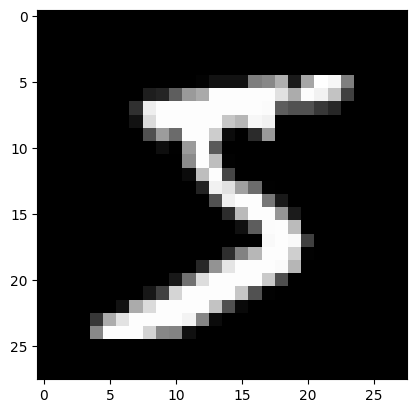

In [16]:
# Import the matplotlib library's pyplot module. This module provides a MATLAB-like interface for making plots and charts.
import matplotlib.pyplot as plt

# Get the first image from the training dataset. In Python, indexing starts from 0, so x_train[0] will give us the first image.
image = x_train[0]

# Display the first image using matplotlib's imshow function. The 'gray' colormap is used to display the image in grayscale.
plt.imshow(image, cmap='gray')

In [17]:
# Image looks like 5 lets look its corrosponding label
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Preprocessing Step

In [18]:
# CNN accepts normal images not flattened ones so we will reshape the images..

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

## Neural network creation and training

In [19]:
# We try to create  a CNN


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)


model=Sequential()

  
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [21]:
model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.0481 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9905